# Q&A Activity Question Week -09

Do the following on the dataset
1. Explain the dataset
2. Check the summary statistics and discuss the max, min, avg, median,
   and percentiles.
3. The manager wants to find out whether the same amount was spent
     for the three advertisements (TV , Radio and Newspaper). Comment
     on your findings.

### Importing libraries and data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Explain the dataset

In [4]:
## reading dataset
df = pd.read_csv('Advertising.csv')

In [5]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [6]:
df.shape

(200, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


**Findings**
- This dataset is about the amount spent for advertisement of the product in TV, radio and Newspaper. The total sales of that respective product is also given.
- There are 200 rows and 5 columns, where 'Unnamed: 0' is not relevant.
- No Null values


In [8]:
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [9]:
df1=df.drop('Unnamed: 0',axis=1)
df1.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


### 2. Check the summary statistics and discuss the max, min, avg, median, and percentiles.

In [10]:
df1.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


 **1. Maximum**

- Maximum amount spent for adverstiement is through TV (296.400000)
 - Maximum amount generated for sales through these 3 set of adverstiements is 27.00
 
**2. Minimum**

- The least amount spent was for advertisements through Radio of nearly zero.
- Lowest amount generated for sales through these 3 set of adverstiements is 1.60

**3. Average**

- The average amount spent is the highest for TV ads followed by Newspaper and Radio ads.
- Average amount for sales is 14.02

**4. Median**

- Median or 50% amount spent for
    - TV -149.750000
    - Radio -22.900000,
    - Newspaper -25.750000
    
**5. Percentiles**

- 75% of time,amount spent for TV ads is more than 74.375, , for Newspaper it was more than 12.750 & for Radio-9.97500
- 25% of time ,amount spent for TV ads is more than 218.825, followed by Newsaper of 45.100 & for Radio-36.525000


- 75% of time,amount for sales generated is more than 10.375000

- 25% of time ,amount or sales generated is more than 17.400000

In [12]:
# reshape the d dataframe suitable for statsmodels package 
df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['TV', 'Radio', 'Newspaper'])
df_melt.columns = ['index', 'adv', 'value']
df_melt

,index,adv,value
0,0,TV,230.1
1,1,TV,44.5
2,2,TV,17.2
3,3,TV,151.5
4,4,TV,180.8
...,...,...,...
595,195,Newspaper,13.8
596,196,Newspaper,8.1
597,197,Newspaper,6.4
598,198,Newspaper,66.2


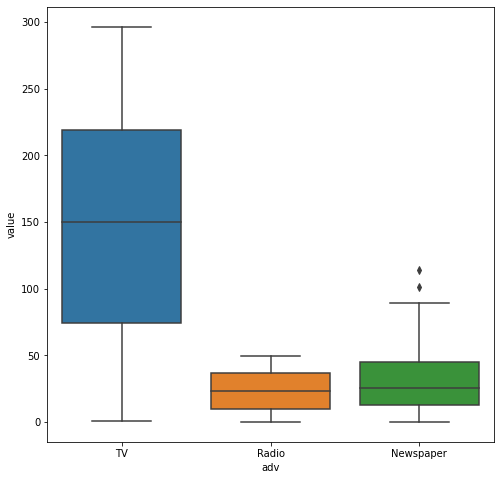

In [17]:
plt.figure(figsize=(8,8))
sns.boxplot(x='adv', y='value', data=df_melt)
plt.show()

### 3. The manager wants to find out whether the same amount was spent for the three advertisements (TV , Radio and Newspaper). Comment on your findings.

Null Hypothesis (H0): amount spent for the three advertisements are equal, ie.μ1 = μ2 = μ3 (where μ = mean)

Alternate Hypothesis (H1): amount spent for the three advertisements are not equal

Significance level,α= 0.05

In [21]:
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(df1['TV'], df1['Radio'], df1['Newspaper'])
print(fvalue, pvalue)

358.8514595342597 4.552931539744962e-103


**Findings**

From the One-way ANOVA Test. performed,

p-value(=0.00) < alpha(=0.05)

We reject the null hypothesis H0.i.e, amount spent was not same for the three advertisements..

In [18]:
#by shiffa Saleem